In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supress warnings 
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
df=pd.read_csv('train_dataset_final1.csv')

In [4]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [6]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [7]:
df.shape

(25247, 27)

In [8]:
#check for null values
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [9]:
df.dtypes

Customer_ID             int64
marriage                int64
sex                     int64
education               int64
LIMIT_BAL               int64
age                   float64
pay_0                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
Bill_amt1             float64
Bill_amt2             float64
Bill_amt3             float64
Bill_amt4             float64
Bill_amt5             float64
Bill_amt6             float64
pay_amt1              float64
pay_amt2              float64
pay_amt3              float64
pay_amt4              float64
pay_amt5              float64
pay_amt6              float64
AVG_Bill_amt          float64
PAY_TO_BILL_ratio     float64
next_month_default      int64
dtype: object

In [10]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [11]:
df.isnull().mean()*100

Customer_ID           0.000000
marriage              0.000000
sex                   0.000000
education             0.000000
LIMIT_BAL             0.000000
age                   0.499069
pay_0                 0.000000
pay_2                 0.000000
pay_3                 0.000000
pay_4                 0.000000
pay_5                 0.000000
pay_6                 0.000000
Bill_amt1             0.000000
Bill_amt2             0.000000
Bill_amt3             0.000000
Bill_amt4             0.000000
Bill_amt5             0.000000
Bill_amt6             0.000000
pay_amt1              0.000000
pay_amt2              0.000000
pay_amt3              0.000000
pay_amt4              0.000000
pay_amt5              0.000000
pay_amt6              0.000000
AVG_Bill_amt          0.000000
PAY_TO_BILL_ratio     0.000000
next_month_default    0.000000
dtype: float64

## Impute null values by mean

In [12]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [13]:
df.isnull().sum()

Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64

# Exploratory Data Analysis(EDA)

## Univariate Analysis

In [14]:
#but categories are specified only for 1,2,3,4 #we will group all these invalid codes to group numner 4 (others)
print(sorted(df['education'].unique()))

[0, 1, 2, 3, 4, 5, 6]


In [15]:
df['education'] = df['education'].replace({0: 4, 5: 4, 6: 4})

In [16]:
#but categories for marriage are specified only for 1,2,3 so we will replace invalid 0 codes with 3(others)
print(sorted(df['marriage'].unique()))

[0, 1, 2, 3]


In [17]:
df['marriage'] = df['marriage'].replace(0, 3)

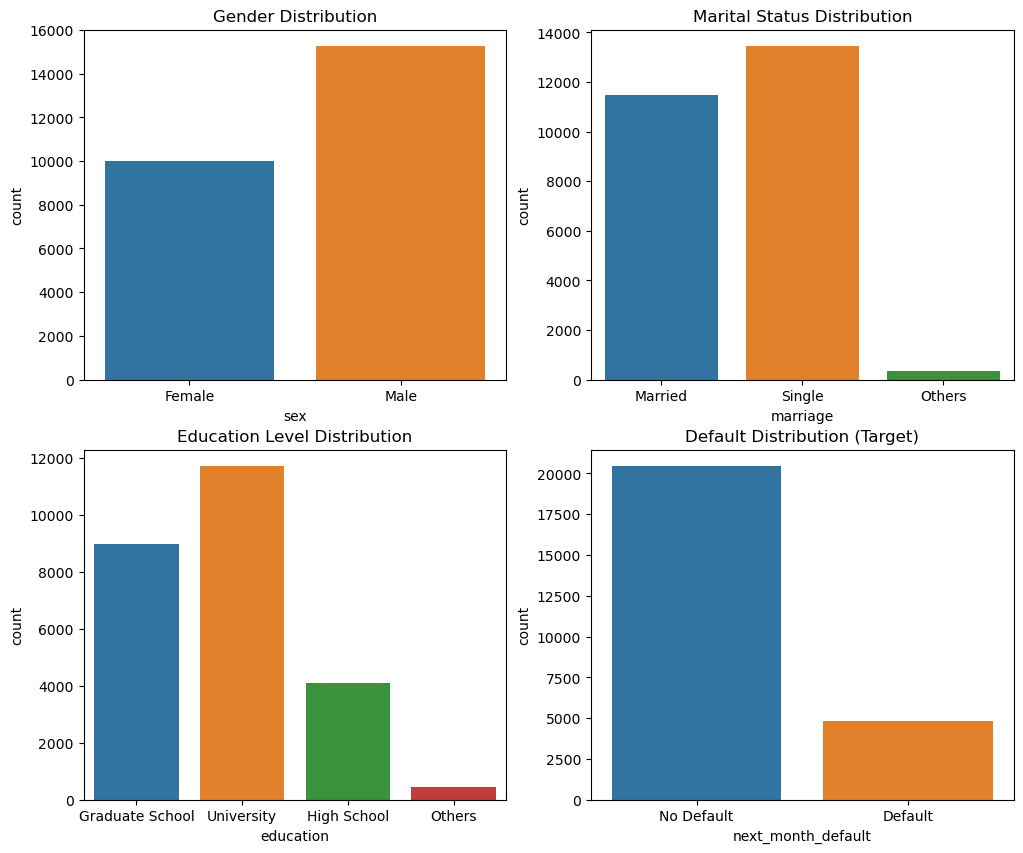

In [18]:
#countplots(categorical variables)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#gender distribution 
sns.countplot(data=df, x='sex', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xticklabels(['Female', 'Male']) 
plt.savefig('gender_dist.png', dpi=300,bbox_inches='tight')

#marital status 
sns.countplot(data=df, x='marriage', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')
axes[0, 1].set_xticklabels(['Married', 'Single', 'Others'])
plt.savefig('marital_status.png', dpi=300,bbox_inches='tight')

#education level
sns.countplot(data=df, x='education', ax=axes[1, 0])
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
plt.savefig('education.png', dpi=300,bbox_inches='tight')

#next month default 
sns.countplot(data=df, x='next_month_default', ax=axes[1, 1])
axes[1, 1].set_title('Default Distribution (Target)')
axes[1, 1].set_xticklabels(['No Default', 'Default']) 
plt.savefig('default_dist.png', dpi=300,bbox_inches='tight')

plt.show()

In [19]:
#default rate by gender#0:female,1:male #in percentage
default_by_sex = df.groupby('sex')['next_month_default'].mean()*100
print(default_by_sex)

sex
0    20.86043
1    17.84684
Name: next_month_default, dtype: float64


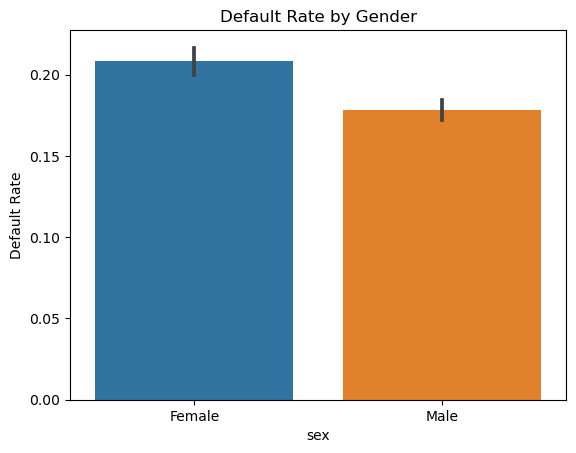

In [20]:
#default rate more among female
sns.barplot(x='sex', y='next_month_default', data=df)
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('Default Rate')
plt.title('Default Rate by Gender')
plt.savefig('default_by_gender.png', dpi=300,bbox_inches='tight')

plt.show()

In [21]:
default_by_marriage = df.groupby('marriage')['next_month_default'].mean()*100
print(default_by_marriage)

marriage
1    20.374564
2    17.885574
3    19.631902
Name: next_month_default, dtype: float64


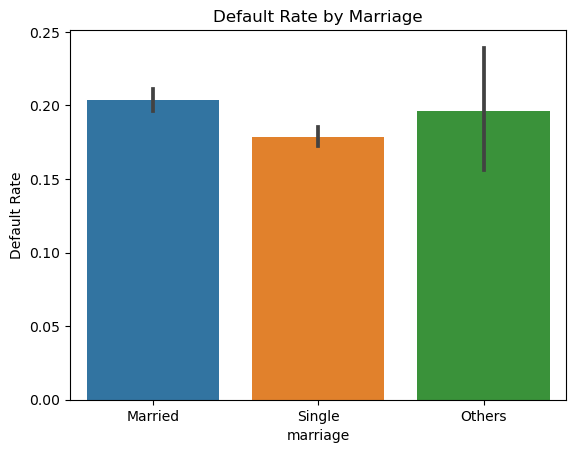

In [22]:
sns.barplot(x='marriage', y='next_month_default', data=df)
plt.xticks([0,1,2], ['Married', 'Single','Others'])
plt.ylabel('Default Rate')
plt.title('Default Rate by Marriage')
plt.savefig('default_by_marriage.png', dpi=300,bbox_inches='tight')

plt.show()

In [23]:
default_by_education = df.groupby('education')['next_month_default'].mean()*100
print(default_by_education)

education
1    16.177125
2    20.909789
3    21.312272
4     6.088993
Name: next_month_default, dtype: float64


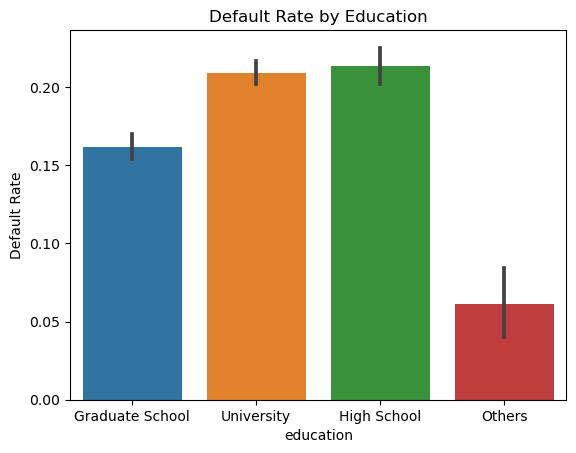

In [24]:
sns.barplot(x='education', y='next_month_default', data=df)
plt.xticks([0,1,2,3], ['Graduate School', 'University','High School','Others'])
plt.ylabel('Default Rate')
plt.title('Default Rate by Education')
plt.savefig('default_by_education.png', dpi=300,bbox_inches='tight')

plt.show()

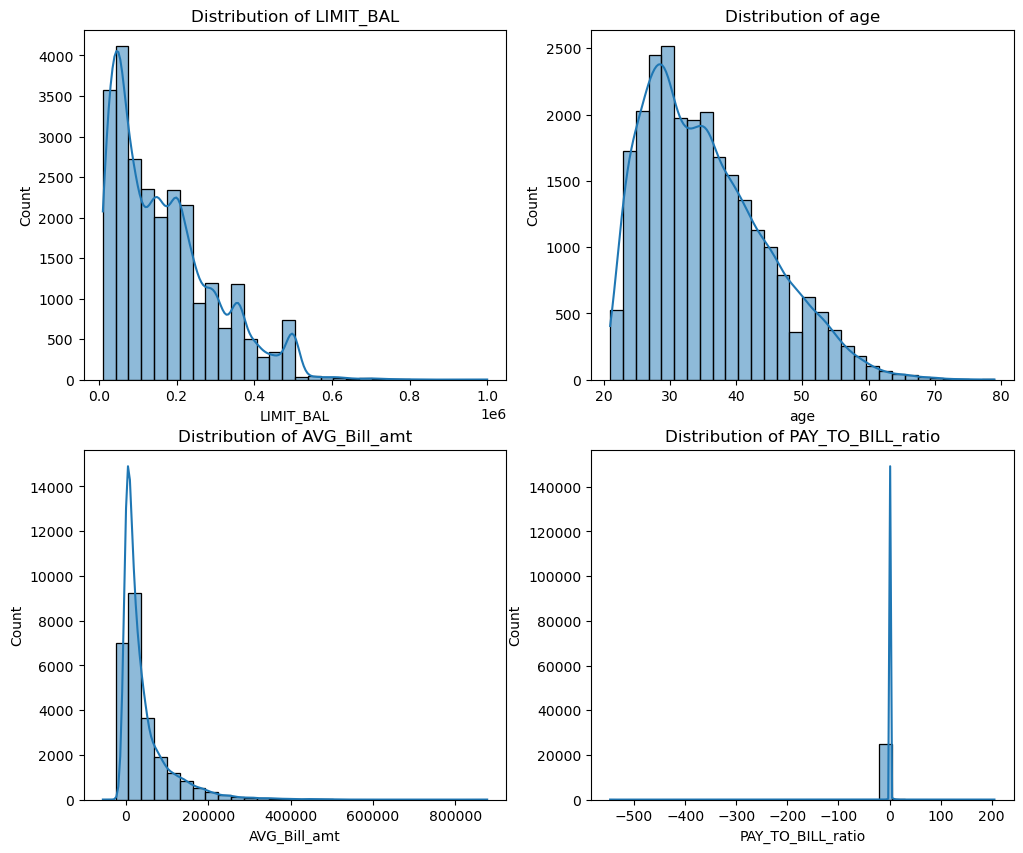

In [25]:
#histogram(continuous variables)
cont_features = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

plt.figure(figsize=(12, 10))
for i, col in enumerate(cont_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.savefig('cont_feautures.png', dpi=300,bbox_inches='tight')

plt.show()

## Bivariate Analysis:

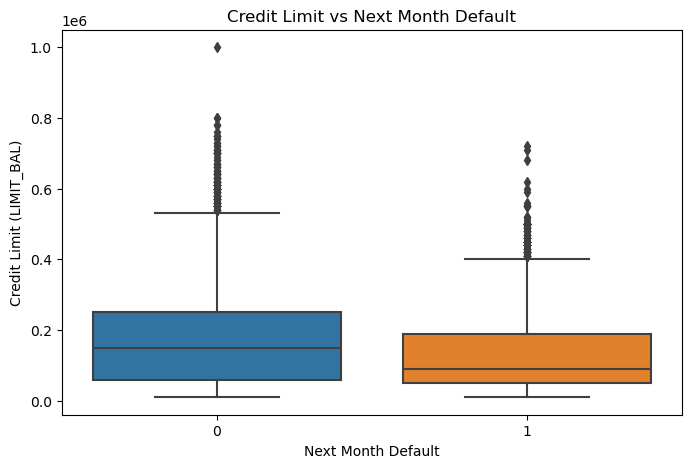

In [26]:
#boxplot of credit limit(LIMIT_BAL) vs next month default
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='next_month_default', y='LIMIT_BAL')
plt.title('Credit Limit vs Next Month Default')
plt.xlabel('Next Month Default')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.savefig('creditlim_box.png', dpi=300,bbox_inches='tight')

plt.show()

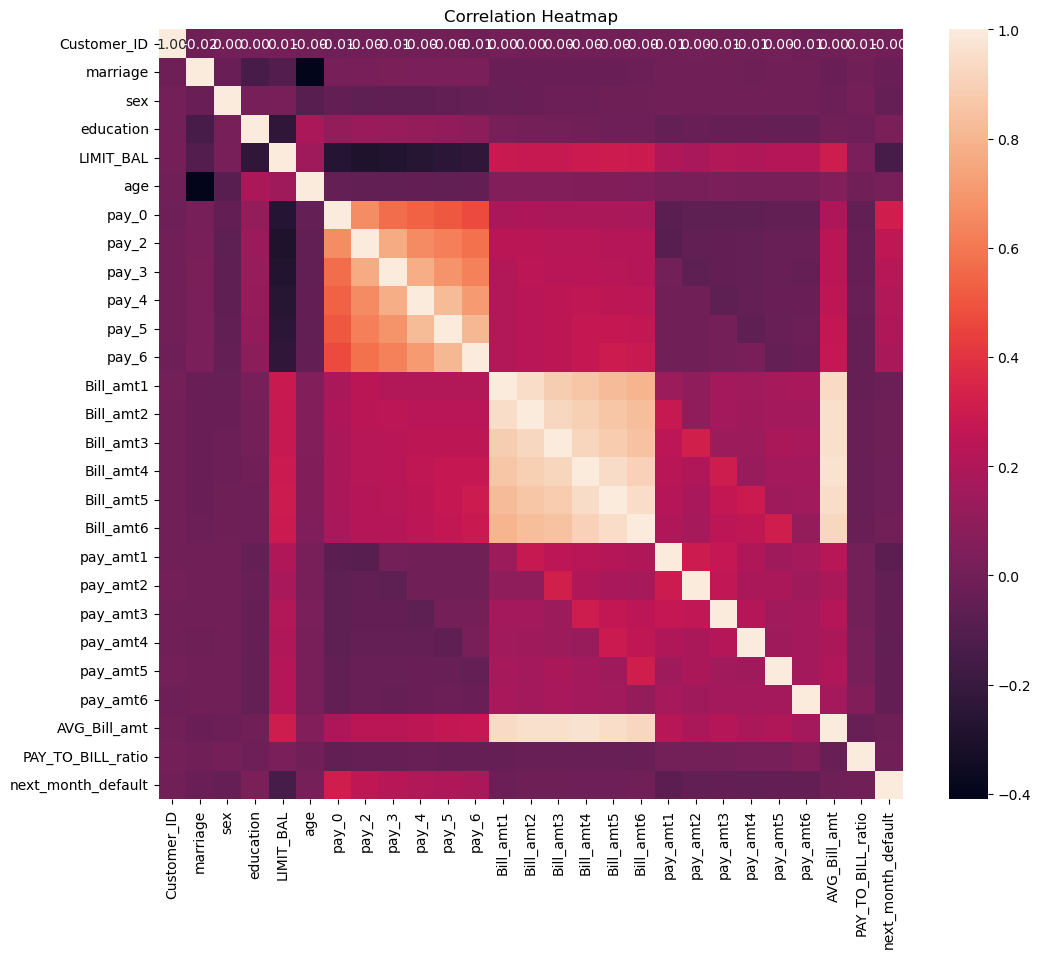

In [27]:
#correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('corr_heatmap.png', dpi=300,bbox_inches='tight')

plt.show()

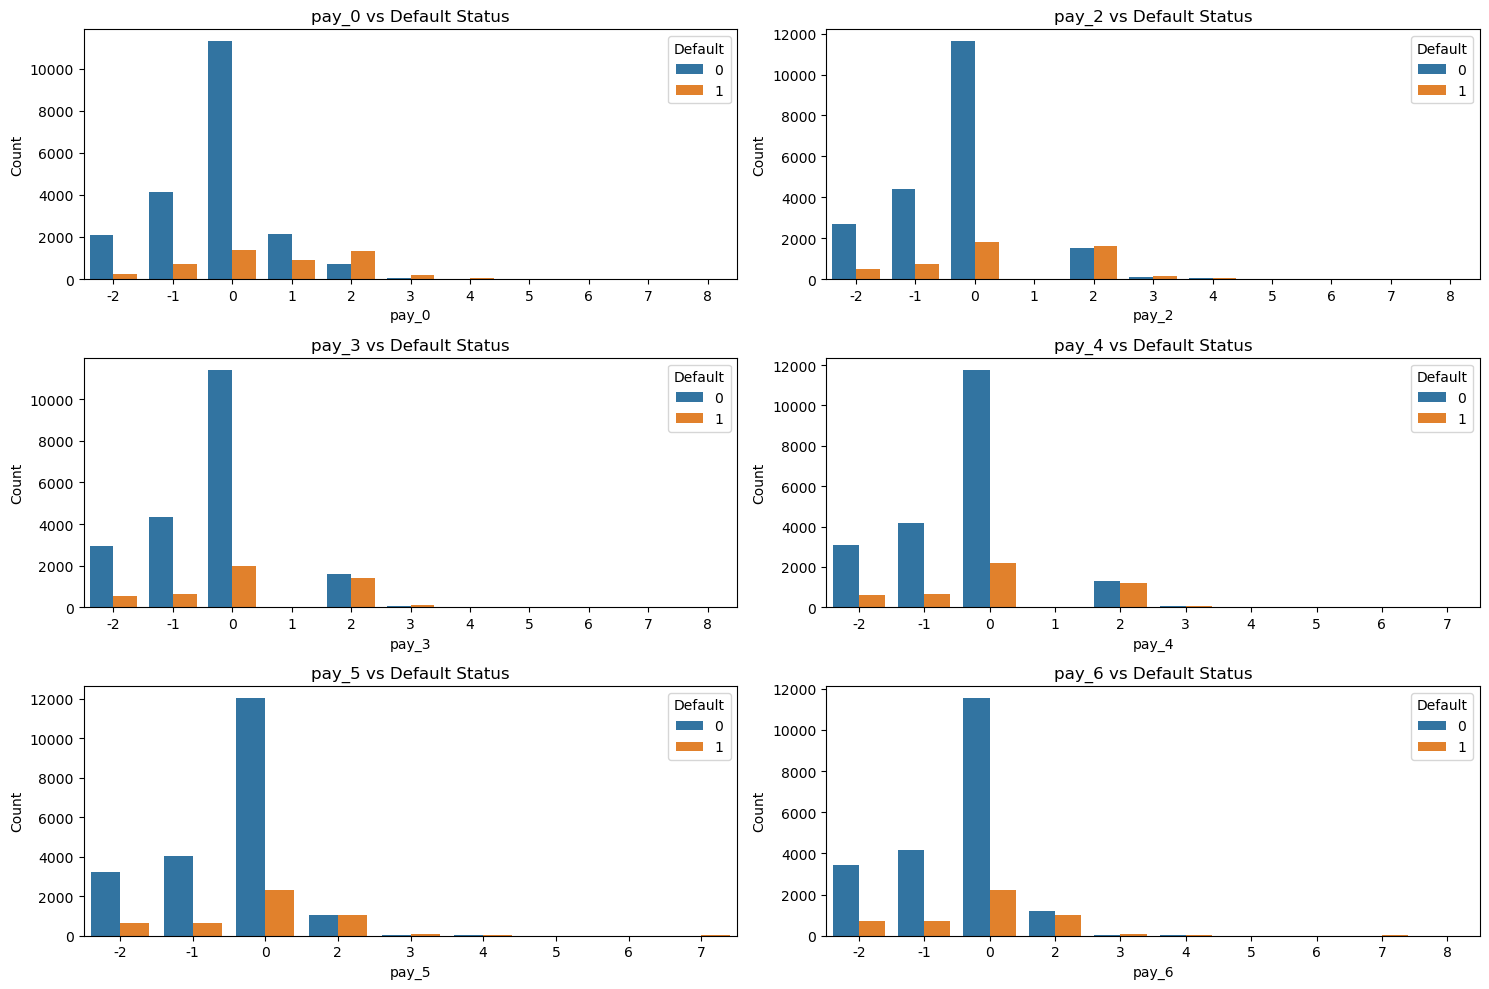

In [28]:
#overdue payment patterns
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

plt.figure(figsize=(15, 10))
for i, col in enumerate(pay_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue=df['next_month_default'].astype(str))
    plt.title(f'{col} vs Default Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Default')
plt.tight_layout()
plt.savefig('overdue_payment.png', dpi=300,bbox_inches='tight')

plt.show()

In [29]:
#feature mean grouped by next_month_default 
df.groupby('next_month_default')[['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']].mean()

,LIMIT_BAL,age,AVG_Bill_amt,PAY_TO_BILL_ratio
next_month_default,,,,
0,177539.236791,35.359693,45307.275764,0.376491
1,129234.449761,35.772016,42956.272817,0.305434


# Financial Insight Extraction

## Delinquency Streak

In [30]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

#no of months a customer was overdue is delinquency streak
df['delinquency_streak'] = df[pay_cols].apply(lambda row: (row >= 1).sum(), axis=1)

#average delinquency streak by default status
print(df.groupby('next_month_default')['delinquency_streak'].mean().round(2))

next_month_default
0    0.5
1    2.0
Name: delinquency_streak, dtype: float64


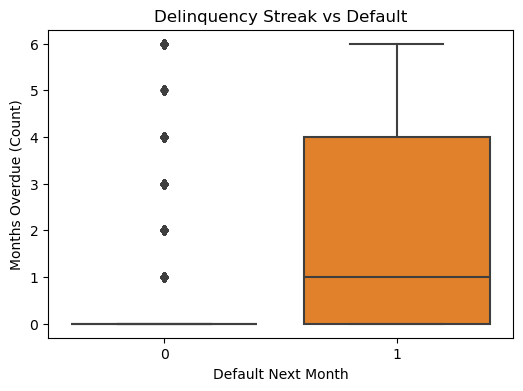

In [31]:
plt.figure(figsize=(6, 4))

sns.boxplot(x='next_month_default', y='delinquency_streak', data=df)
plt.title('Delinquency Streak vs Default')
plt.xlabel('Default Next Month')
plt.ylabel('Months Overdue (Count)')
plt.savefig('delinquency_streak.png', dpi=300,bbox_inches='tight')

plt.show()

Higher delinquency_streak likely correlates with default risk.

## Classify Underpayers

In [32]:
# payment percent patterns
df['payment_behavior'] = pd.cut(df['PAY_TO_BILL_ratio'],
                                 bins=[-1, 0.5, 1.0, np.inf],
                                 labels=['Underpayer (<50%)', 'Moderate Payer (50-100%)', 'Full/Overpayer (>100%)'])

#no of defaulters into each category
payment_default_counts = pd.crosstab(df['payment_behavior'], df['next_month_default'], normalize='index') * 100
print(payment_default_counts)

next_month_default                0          1
payment_behavior                              
Underpayer (<50%)         78.692574  21.307426
Moderate Payer (50-100%)  86.697248  13.302752
Full/Overpayer (>100%)    87.106258  12.893742


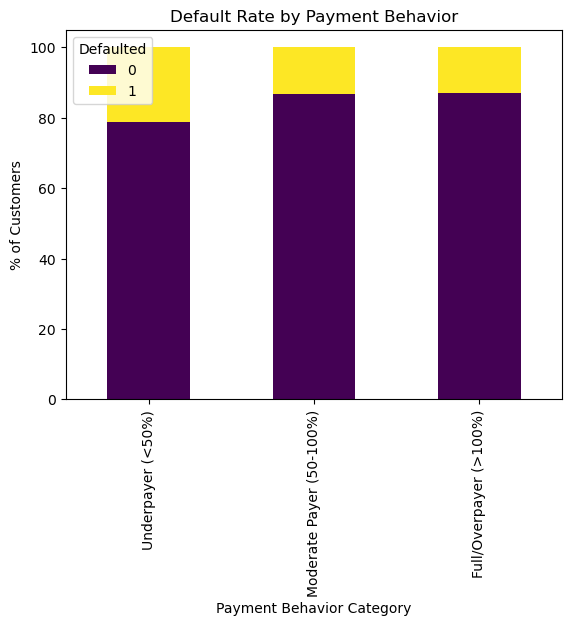

In [33]:
payment_default_counts.plot(kind='bar', stacked=True,colormap='viridis')
plt.title('Default Rate by Payment Behavior')
plt.xlabel('Payment Behavior Category')
plt.ylabel('% of Customers')
plt.legend(title='Defaulted')
plt.savefig('underpayers_class.png', dpi=300,bbox_inches='tight')

plt.show()

Underpayers (<50%) will likely show a higher default rate

## Credit Utilization Ratio

In [34]:
#credit utilization ratio = bill / credit limit
df['credit_utilization_ratio'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']

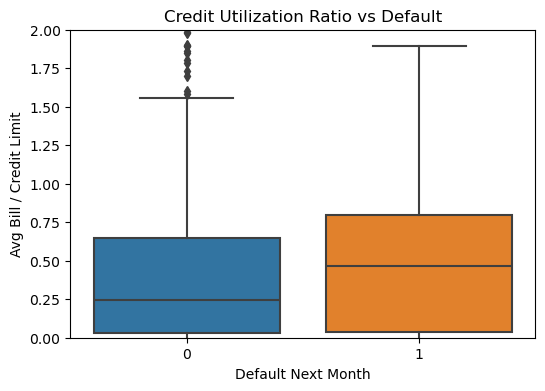

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='next_month_default', y='credit_utilization_ratio', data=df)
plt.title('Credit Utilization Ratio vs Default')
plt.xlabel('Default Next Month')
plt.ylabel('Avg Bill / Credit Limit')
plt.ylim(0, 2)
plt.savefig('utilization_ratio.png', dpi=300,bbox_inches='tight')

plt.show()

next_month_default      0      1
utilization_level               
Low (≤30%)          84.74  15.26
Moderate (30-70%)   80.18  19.82
High (70-100%)      74.14  25.86
Overlimit (>100%)   68.46  31.54


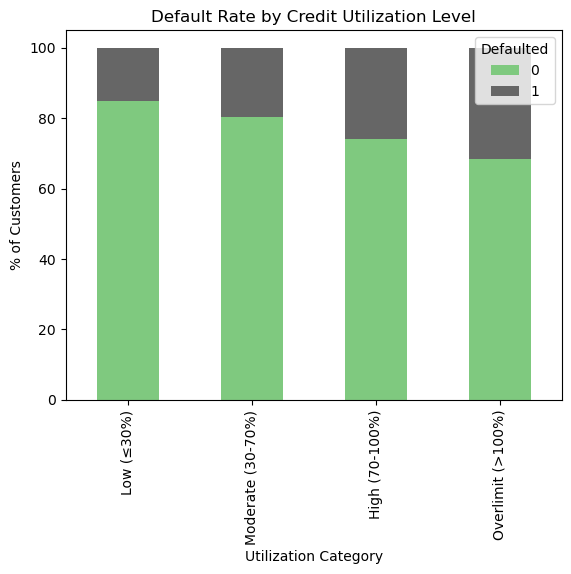

In [36]:
#utlization classification into levels
df['utilization_level'] = pd.cut(df['credit_utilization_ratio'],
                                  bins=[-1, 0.3, 0.7, 1.0, np.inf],
                                  labels=['Low (≤30%)', 'Moderate (30-70%)', 'High (70-100%)', 'Overlimit (>100%)'])

# compare default rate by utilization level
util_default = pd.crosstab(df['utilization_level'], df['next_month_default'], normalize='index') * 100
print(util_default.round(2))

util_default.plot(kind='bar', stacked=True,colormap='Accent')
plt.title('Default Rate by Credit Utilization Level')
plt.xlabel('Utilization Category')
plt.ylabel('% of Customers')
plt.legend(title='Defaulted')
plt.savefig('utilization_level.png', dpi=300,bbox_inches='tight')

plt.show()

## Feature Engineering

In [37]:
#average monthly bill as a proportion of credit limit #average utilization over 6 months 
df['avg_utilization'] = df[['Bill_amt1','Bill_amt2','Bill_amt3',
                            'Bill_amt4','Bill_amt5','Bill_amt6']].mean(axis=1) / df['LIMIT_BAL']

In [38]:
#sum of all monthly bills#total bill over 6 months
df['total_bill'] = df[['Bill_amt1','Bill_amt2','Bill_amt3',
                       'Bill_amt4','Bill_amt5','Bill_amt6']].sum(axis=1)

In [39]:
#sum of all payments made #total payment over 6 months
df['total_pay'] = df[['pay_amt1','pay_amt2','pay_amt3',
                      'pay_amt4','pay_amt5','pay_amt6']].sum(axis=1)

In [40]:
df[['avg_utilization', 'total_bill', 'total_pay', 'delinquency_streak','credit_utilization_ratio']].describe().round(2)

,avg_utilization,total_bill,total_pay,delinquency_streak,credit_utilization_ratio
count,25247.00,25247.00,25247.00,25247.00,25247.00
mean,0.37,269381.65,32098.11,0.79,0.37
std,0.35,376845.62,62486.95,1.51,0.35
min,0.00,0.00,0.00,0.00,-0.20
25%,0.03,29384.55,6751.20,0.00,0.03
50%,0.28,126676.86,14598.95,0.00,0.28
75%,0.68,342856.38,33849.30,1.00,0.68
max,3.76,5263884.49,3764065.93,6.00,3.76


In [41]:
df[['avg_utilization', 'total_bill', 'total_pay', 'delinquency_streak', 'next_month_default']].corr()

,avg_utilization,total_bill,total_pay,delinquency_streak,next_month_default
avg_utilization,1.000000,0.547329,0.032858,0.230838,0.111870
total_bill,0.547329,1.000000,0.343255,0.003218,-0.014674
total_pay,0.032858,0.343255,1.000000,-0.122932,-0.092854
delinquency_streak,0.230838,0.003218,-0.122932,1.000000,0.389616
next_month_default,0.111870,-0.014674,-0.092854,0.389616,1.000000


## Handling Class Imbalance

In [42]:
#count and percentage of each class
class_counts = df['next_month_default'].value_counts()
class_percent = df['next_month_default'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Distribution (%):\n", class_percent.round(2))

Class Counts:
 next_month_default
0    20440
1     4807
Name: count, dtype: int64

Class Distribution (%):
 next_month_default
0    80.96
1    19.04
Name: proportion, dtype: float64


In [43]:
#split features and target for training and testing
X = df.drop(['Customer_ID', 'next_month_default'], axis=1)
y = df['next_month_default']

In [44]:
#check if any column has Nan value
missing_cols = X.columns[X.isnull().any()]
print("Columns with NaNs:\n", X[missing_cols].isnull().sum())

Columns with NaNs:
 payment_behavior    69
dtype: int64


In [45]:
#impute missing values in all columns with mean and mode

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
#separate numerical and categorical columns
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

#impute numerics with mean
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

#impute categoricals with mode(most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

## Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

## SMOTE

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("SMOTE applied successfully!!")
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

SMOTE applied successfully!!
Class distribution after SMOTE:
 next_month_default
0    20440
1    20440
Name: count, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:
#logistic Regression
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

#XGBoost
xgb = XGBClassifier(eval_metric='logloss').fit(X_train, y_train)

#LightGBM
lgb = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 16330, number of negative: 16374
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7652
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499327 -> initscore=-0.002691
[LightGBM] [Info] Start training from score -0.002691


## Model Evaluation

In [54]:
from sklearn.metrics import precision_score, recall_score, fbeta_score,f1_score,roc_auc_score,confusion_matrix,classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print("F1 score:", f1_score(y_test, y_pred))
    print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
    print("ROC AUC score:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report\n",classification_report(y_test, y_pred))

In [55]:
#logistic regression evaluation
evaluate_model(lr,X_test,y_test)

F1 score: 0.669662428759316
F2 score: 0.7119884403840776
ROC AUC score: 0.6818260861239667
Confusion Matrix:
 [[2107 1959]
 [1055 3055]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.52      0.58      4066
           1       0.61      0.74      0.67      4110

    accuracy                           0.63      8176
   macro avg       0.64      0.63      0.63      8176
weighted avg       0.64      0.63      0.63      8176



In [56]:
#XGBoost evaluation #better performance compared to other models
evaluate_model(xgb, X_test, y_test)

F1 score: 0.8880348449910326
F2 score: 0.8606475963448551
ROC AUC score: 0.9473836203852971
Confusion Matrix:
 [[3836  230]
 [ 644 3466]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4066
           1       0.94      0.84      0.89      4110

    accuracy                           0.89      8176
   macro avg       0.90      0.89      0.89      8176
weighted avg       0.90      0.89      0.89      8176



In [57]:
#LightGBM evaluation
evaluate_model(lgb,X_test,y_test)

F1 score: 0.89006043461489
F2 score: 0.8606455463271498
ROC AUC score: 0.947601796632929
Confusion Matrix:
 [[3860  206]
 [ 649 3461]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4066
           1       0.94      0.84      0.89      4110

    accuracy                           0.90      8176
   macro avg       0.90      0.90      0.90      8176
weighted avg       0.90      0.90      0.90      8176



In [58]:
#find best threshold
from sklearn.metrics import fbeta_score

y_scores = xgb.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = [fbeta_score(y_test, y_scores > t, beta=2) for t in thresholds]

best_threshold = thresholds[np.argmax(f2_scores)]
print("Best threshold for F2:", best_threshold)

Best threshold for F2: 0.19999999999999996


In [59]:
import shap

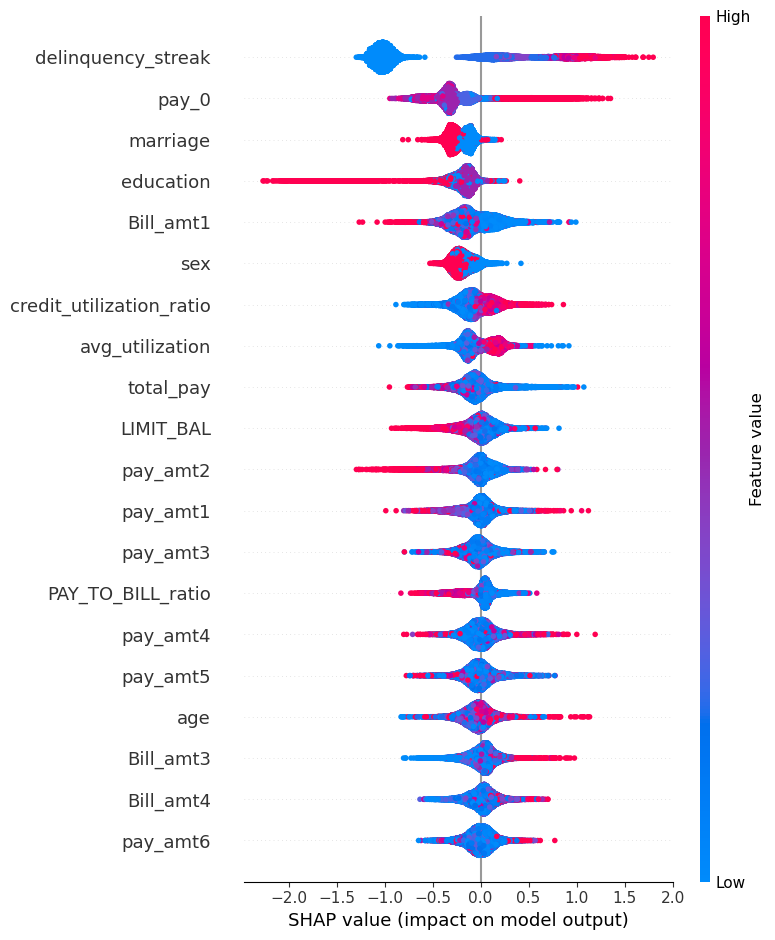

<Figure size 640x480 with 0 Axes>

In [60]:
#shap explainer
plt.figure(figsize=(12,10))
explainer = shap.Explainer(xgb)
shap_values = explainer(X)

shap.summary_plot(shap_values, features=X, feature_names=X.columns)
plt.savefig("shap_summary_plot.png", bbox_inches='tight', dpi=300)

# Validation dataset prediction

In [76]:
#load validation set
val = pd.read_csv('validate_dataset_final.csv')

In [77]:
val.shape

(5016, 26)

In [78]:
val.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [79]:
#feature columns
bill_cols = ['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']
pay_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
pay_status_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

## Feature Engineering

In [80]:
val['avg_utilization'] = val[bill_cols].mean(axis=1) / val['LIMIT_BAL']
val['total_bill'] = val[bill_cols].sum(axis=1)
val['total_pay'] = val[pay_cols].sum(axis=1)
val['delinquency_streak'] = val[pay_status_cols].apply(lambda x: (x >= 1).sum(), axis=1)
val['delinquency_streak'] = val[pay_status_cols].apply(lambda x: (x >= 1).sum(), axis=1)
val['credit_utilization_ratio'] = val['AVG_Bill_amt'] / val['LIMIT_BAL']

In [81]:
#categorical features tranform
val['utilization_level'] = pd.cut(
    val['credit_utilization_ratio'],
    bins=[-1, 0.3, 0.7, 1.0, float('inf')],
    labels=['Low (≤30%)', 'Moderate (30–70%)', 'High (70–100%)', 'Overlimit (>100%)']
)

In [82]:
val['payment_behavior'] = pd.cut(
    val['PAY_TO_BILL_ratio'],
    bins=[-1, 0.5, 1.0, float('inf')],
    labels=['Underpayer (<50%)', 'Moderate Payer (50-100%)', 'Full/Overpayer (>100%)']
)

## Label Encoding

In [83]:
from sklearn.impute import SimpleImputer

In [84]:
for col in ['utilization_level', 'payment_behavior']:
    le = LabelEncoder()
    val[col] = le.fit_transform(val[col].astype(str))

In [85]:
#match features with training set
features_used = xgb.feature_names_in_  
X_val = val[features_used]

In [86]:
#impute numeric features with mean
num_cols = val.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
val[num_cols] = imputer.fit_transform(val[num_cols])

In [87]:
X_val = val.drop(columns=['Customer_ID'])

In [88]:
#to ensure exact column order as training set
X_val = val[list(xgb.feature_names_in_)] 

In [89]:
#prediction using XGBoost
val_probs = xgb.predict_proba(X_val)[:, 1]
val_pred = (val_probs > best_threshold).astype(int)

In [91]:
submission = pd.DataFrame({
    'Customer_ID': val['Customer_ID'],  # use exact original column name
    'next_month_default': val_pred
})

submission.to_csv("submission_23118082.csv", index=False)